# Slides - SW02

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## Boxplot: Schematischer Aufbau

count    13.000000
mean     80.020769
std       0.023966
min      79.970000
25%      80.020000
50%      80.030000
75%      80.040000
max      80.050000
dtype: float64


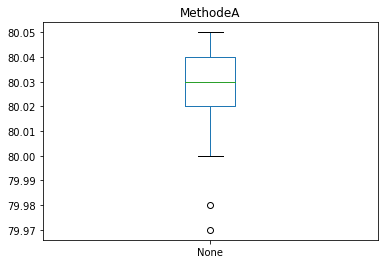

In [2]:
methodeA = Series([79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97, 80.05, 80.03, 80.02, 80.00, 80.02])
print(methodeA.describe())
methodeA.plot(kind="box", title="MethodeA")

## Empirische kumulative Verteilungsfunktion

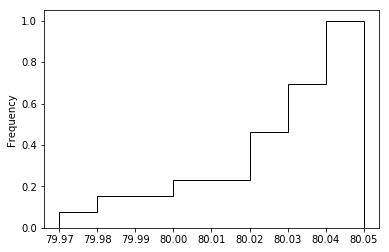

In [3]:
methodeA.plot(kind="hist", cumulative=True, histtype="step", normed=True, bins=8, edgecolor="black")

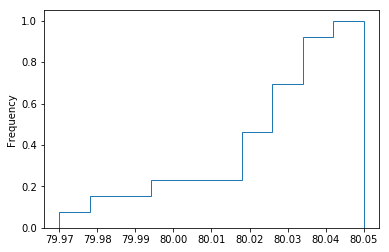

In [4]:
methodeA.plot(kind='hist', cumulative=True, histtype='step', normed=True)

## 2 Dimensionen

In [5]:
mort = DataFrame({
    "wine": ([2.8, 3.2, 3.2, 3.4, 4.3, 4.9, 5.1, 5.2, 5.9, 5.9, 6.6, 8.3, 12.6, 15.1, 25.1, 33.1, 75.9, 75.9]),
    "mor": ([6.2, 9.0, 7.1, 6.8, 10.2, 7.8, 9.3, 5.9, 8.9, 5.5, 7.1, 9.1, 5.1, 4.7, 4.7, 3.1, 3.2, 2.1])
})

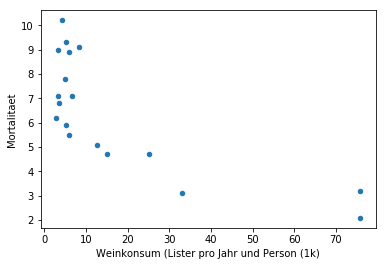

In [6]:
mort.plot(kind="scatter", x="wine", y="mor")
plt.xlabel("Weinkonsum (Lister pro Jahr und Person (1k)")
plt.ylabel("Mortalitaet")
plt.show()

In [7]:
geysir = pd.read_table("data/geysir.dat", sep=" ", index_col=0)
geysir.head()

,Tag,Zeitspanne,Eruptionsdauer
1,1,78,4.4
2,1,74,3.9
3,1,68,4.0
4,1,76,4.0
5,1,80,3.5


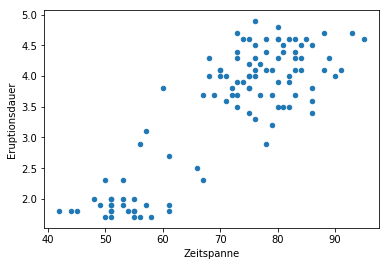

In [8]:
geysir.plot(kind="scatter", x="Zeitspanne", y="Eruptionsdauer")
plt.xlabel("Zeitspanne")
plt.ylabel("Eruptionsdauer")
plt.show()

## Lineare Regression

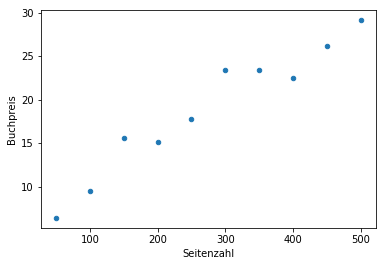

In [9]:
book = DataFrame({
    "pages" : np.linspace(50,500,10),
    "price" : [6.4, 9.5, 15.6, 15.1, 17.8, 23.4, 23.4, 22.5, 26.1, 29.1]
})

book.plot(kind="scatter", x="pages", y="price")
plt.xlabel("Seitenzahl")
plt.ylabel("Buchpreis")

plt.show()

y = ax + b => y = 6.04x + 0.05 


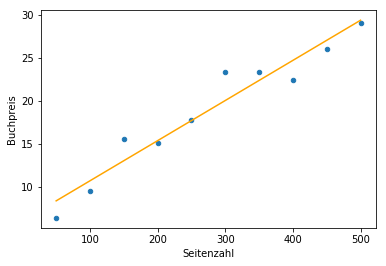

In [10]:
book.plot(kind="scatter", x="pages", y="price")

b, a = np.polyfit(book["pages"], book["price"], deg=1)
x = np.linspace(book["pages"].min() ,book["pages"].max())

print("y = ax + b => y = %.2fx + %.2f " % (a, b))

plt.plot(x, a+b*x, c="orange")
plt.xlabel("Seitenzahl")
plt.ylabel("Buchpreis")
plt.show()

In [11]:
bookWith375pages = ((b*375)+a)
print("bookWith375pages = %.2f" % (bookWith375pages))
bookWith1Mpages = ((b*1000000)+a)
print("bookWith1Mpages = %.2f" % (bookWith1Mpages))

bookWith375pages = 23.56
bookWith1Mpages = 46733.31


## Körpergrösse Vater-Sohn

In [12]:
vatersohn = DataFrame({
    "vater": ([152, 157, 163, 165, 168, 170, 173, 178, 183, 188]),
    "sohn": ([162, 166, 168, 166, 170, 170, 171, 173, 178, 178])
})
vatersohn

,sohn,vater
0,162,152
1,166,157
2,168,163
3,166,165
4,170,168
5,170,170
6,171,173
7,173,178
8,178,183
9,178,188


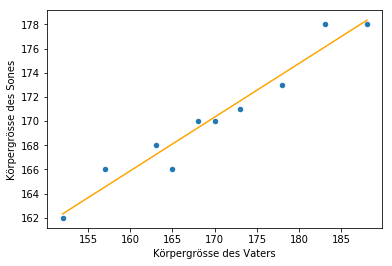

y = mx + b => y = 0.445x + 94.7 
Grösse von 180 cm des Vater = 175
Grösse von 0 cm des Vater = 94.7


In [13]:
vatersohn.plot(kind="scatter", x="vater", y="sohn")

m, b = np.polyfit(vatersohn["vater"], vatersohn["sohn"], deg=1)
x = np.linspace(vatersohn["vater"].min(), vatersohn["vater"].max())

plt.plot(x, b+m*x, c="orange")

plt.xlabel("Körpergrösse des Vaters")
plt.ylabel("Körpergrösse des Sones")

plt.show()

print("y = mx + b => y = %.3fx + %.1f " % (m, b))

vatersohnGroesse180 = (m*180) + b
print("Grösse von 180 cm des Vater = %.0f" % (vatersohnGroesse180))

vatersohnGroesse0 = (m*00) + b
print("Grösse von 0 cm des Vater = %.1f" % (vatersohnGroesse0))

## Autounfälle

In [14]:
trafficCollision = DataFrame({
    "died1988" : ([121,96,85,113,102,118,90,84,107,112,95,101]),
    "died1989" : ([104,91,101,110,117,108,96,102,114,96,88,106])
})
trafficCollision.head()

,died1988,died1989
0,121,104
1,96,91
2,85,101
3,113,110
4,102,117


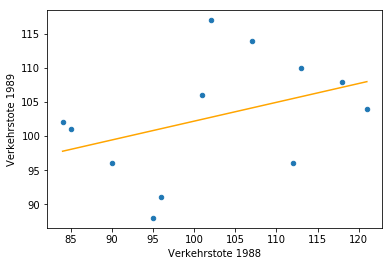

y = mx + b => y = 0.276x + 74.6 


In [15]:
trafficCollision.plot(kind="scatter", x="died1988", y="died1989")

# Regression
m, b = np.polyfit(trafficCollision["died1988"], trafficCollision["died1989"], deg=1)
x = np.linspace(trafficCollision["died1988"].min(), trafficCollision["died1988"].max())

plt.plot(x, b + m*x, c="orange")

plt.xlabel("Verkehrstote 1988")
plt.ylabel("Verkehrstote 1989")

plt.show()
print("y = mx + b => y = %.3fx + %.1f " % (m, b))

## Weinkonsum

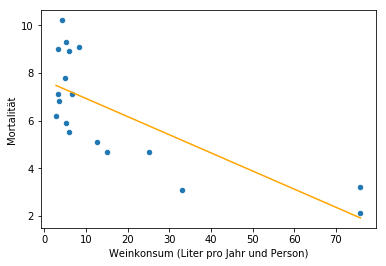

y = mx + b => y = -0.07608x + 7.68655 


In [16]:
mort.plot(kind="scatter", x="wine", y="mor")

# Regression
m, b = np.polyfit(mort["wine"], mort["mor"], deg=1)
x = np.linspace(mort["wine"].min(), mort["wine"].max())

plt.plot(x, b + m*x, c="orange")

plt.xlabel("Weinkonsum (Liter pro Jahr und Person)")
plt.ylabel("Mortalität")

plt.show()
print("y = mx + b => y = %.5fx + %.5f " % (m, b))

## Empirische Korrelation

In [17]:
book.head()

,pages,price
0,50.0,6.4
1,100.0,9.5
2,150.0,15.6
3,200.0,15.1
4,250.0,17.8


In [18]:
book.corr().iloc[0,1]

0.9681121878410434

In [19]:
book.corr()

,pages,price
pages,1.000000,0.968112
price,0.968112,1.000000


In [20]:
print("Körpergrösse von Vater und Sohn: %.3f" % vatersohn.corr().iloc[0,1])
print("Verkehrsunfällen: %.3f" % trafficCollision.corr().iloc[0,1])
print("Weinkonsum: %.3f" % mort.corr().iloc[0,1])

Körpergrösse von Vater und Sohn: 0.973
Verkehrsunfällen: 0.386
Weinkonsum: -0.746
